In [1]:
import polars as pl
import pandas as pd
from IPython.display import display

In [2]:
from Predictors.Pb.features import validate_features_vs_target

In [3]:
from data.Constants.ColumnNames import WsfrlColumnOverall
from data.Constants.ColumnNames import WsfrlColumnPriorStats
from data.Constants.ColumnNames import WsfrlColumnForAges


In [4]:
import Predictors.DataPrep as dp
df_ages = dp.get_data()

display(df_ages)

Position,Time,time_in_seconds,Bib Number,Name,Gender,Gender Position,Club,is_club_member,Points,RaceName,year,month,day,date,distance,pace,club_position,club_position_gender,is_pb,first_time_run,prior_run_attempts,prior_quickest_run_in_year,prior_quickest_run_time,prior_quickest_run_time_in_seconds,prior_quickest_run_position,prior_time_vs_current_change,prior_time_vs_current_time,prior_quickest_vs_run_time,fellow_club_mates_running,fellow_club_mates_running_male,fellow_club_mates_running_female,best_position_year_to_date,average_position_year_to_date,worst_position_year_to_date,best_points_year_to_date,average_points_year_to_date,worst_points_year_to_date,runs_in_wsfrl_year_to_date,wsfrl_tenure_in_runs,wsfrl_tenure_in_years,position_record_years_since_best,position_record_years_since_worst,position_record_best_year,position_record_worst_year,position_record_best_position_all_time,position_record_average_position_all_time,position_record_worst_position_all_time,p_of_10_firstname,p_of_10_surname,p_of_10_track_age_category,p_of_10_road_age_category,p_of_10_xc_age_category,p_of_10_gender,p_of_10_club,p_of_10_athlete_id,match_type,matches,parameters_used,min_age,max_age,average_age,min_dob,max_dob,avg_dob
i64,str,f64,i64,str,str,f64,str,bool,f64,str,i64,i64,i64,str,f64,str,f64,f64,bool,bool,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,f64,str,f64,str,f64,f64,f64,f64,f64,f64
3,"""00:29:14""",1754.0,880,"""Andrew Masters""","""M""",3.0,"""Lewes AC""",true,10.0,"""Beach Run""",2014,7,16,"""2014-07-16""",8.0,"""0:03:39.250000""",1.0,1.0,false,true,0.0,null,null,null,null,null,null,null,24.0,16.0,8.0,12.0,12.0,12.0,10.0,10.0,10.0,1.0,1.0,1.0,0.0,0.0,2014.0,2014.0,12.0,12.0,12.0,"""Andrew""","""Masters""","""V50""","""V50""","""V50""","""M""","""Lewes/West 4/Wimbledon Windmil…",80881.0,"""match""",1.0,"""all""",40.0,44.0,42.0,1974.0,1970.0,1972.0
4,"""00:29:34""",1774.0,588,"""Paul Cousins""","""M""",4.0,"""Haywards Heath Harriers""",true,10.0,"""Beach Run""",2014,7,16,"""2014-07-16""",8.0,"""0:03:41.750000""",1.0,1.0,false,true,0.0,null,null,null,null,null,null,null,9.0,5.0,4.0,2.0,5.0,7.0,10.0,10.0,10.0,3.0,3.0,1.0,0.0,0.0,2014.0,2014.0,2.0,5.0,7.0,"""Paul""","""Cousins""","""V60""","""V60""","""V60""","""M""","""Haywards Heath""",9998.0,"""match""",1.0,"""all""",50.0,54.0,52.0,1964.0,1960.0,1962.0
5,"""00:29:47""",1787.0,902,"""Michael Neville""","""M""",5.0,"""Chichester Runners""",true,10.0,"""Beach Run""",2014,7,16,"""2014-07-16""",8.0,"""0:03:43.375000""",1.0,1.0,false,true,0.0,null,null,null,null,null,null,null,38.0,21.0,17.0,null,null,null,null,null,null,0.0,0.0,0.0,null,null,null,null,null,null,null,"""Michael""","""Neville""","""V45""","""V45""","""V45""","""M""","""Chichester""",43629.0,"""match""",1.0,"""all""",35.0,39.0,37.0,1979.0,1975.0,1977.0
6,"""00:30:07""",1807.0,918,"""Conrad Meagher""","""M""",6.0,"""Chichester Runners""",true,10.0,"""Beach Run""",2014,7,16,"""2014-07-16""",8.0,"""0:03:45.875000""",2.0,2.0,false,true,0.0,null,null,null,null,null,null,null,38.0,21.0,17.0,null,null,null,null,null,null,0.0,0.0,0.0,null,null,null,null,null,null,null,"""Conrad""","""Meagher""","""SEN""","""SEN""","""SEN""","""M""","""Havant""",566746.0,"""match""",1.0,"""no_club""",13.0,24.0,18.5,2001.0,1990.0,1995.5
7,"""00:30:09""",1809.0,530,"""John Russell""","""M""",7.0,"""Portslade Hedgehoppers""",true,10.0,"""Beach Run""",2014,7,16,"""2014-07-16""",8.0,"""0:03:46.125000""",1.0,1.0,false,true,0.0,null,null,null,null,null,null,null,23.0,15.0,8.0,10.0,27.0,72.0,10.0,9.0,8.0,10.0,10.0,1.0,0.0,0.0,2014.0,2014.0,10.0,27.0,72.0,null,null,"""TBC""","""TBC""","""TBC""","""n""",null,null,"""missing""",0.0,"""not found""",null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
627,"""00:47:41""",2861.0,631,"""Ann Savidge""","""F""",303.0,"""Burgess 

In [5]:
# Remove all rows where the year is 2014
df_ages = df_ages.filter(
     (pl.col(WsfrlColumnForAges.AgeCategoryRoad) != "TBC")
    & (pl.col('year') != 2014)
    & pl.col(WsfrlColumnForAges.AgeAvgRange).is_not_null()
    & pl.col(WsfrlColumnForAges.AgeMinRange).is_not_null()
    & pl.col(WsfrlColumnForAges.AgeMaxRange).is_not_null()
)


In [6]:
 # Pivot the DataFrame
pivot_df_year_by_age_cat = df_ages.pivot(
    values=[WsfrlColumnForAges.AgeCategoryRoad],
    index="year",
    on=WsfrlColumnForAges.AgeCategoryRoad,
    aggregate_function="len"
).sort("year")

display(pivot_df_year_by_age_cat)


year,V45,SEN,V35,V60,V50,V40,V55,V65,V70,U23,V80,V75,U20,V85,U13,U17,U11,U15
i64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
2015,617,256,232,782,639,339,761,656,394,3,112,214,14,36,6,3,null,5
2016,674,257,298,841,670,399,753,632,397,4,81,209,11,26,12,5,null,5
2017,513,250,252,754,616,291,691,529,303,34,54,168,2,26,19,5,1,5
2018,472,298,267,688,661,358,699,492,243,22,43,180,2,21,3,10,null,11
2019,551,320,248,726,754,331,814,500,271,60,32,175,3,21,2,8,null,8
2020,39,15,16,42,56,31,57,25,13,5,2,9,null,null,1,1,null,1
2022,384,236,201,612,566,281,561,347,162,21,12,91,31,6,null,2,6,7
2023,446,278,191,560,503,283,427,323,134,26,14,80,29,5,null,7,2,9
2024,449,298,242,575,637,347,594,295,179,26,9,68,29,1,8,17,null,15


In [7]:
 # Pivot the DataFrame
# Assuming df_ages is your Polars DataFrame
pivot_df_age_cat = df_ages.pivot(
    values=[WsfrlColumnForAges.AgeCategoryRoad],  # Use "*" to count all occurrences
    index=WsfrlColumnForAges.AgeCategoryRoad,
    on=WsfrlColumnOverall.Gender,
    aggregate_function="len"
).to_pandas()

print(type(df_ages))
# # Sum the counts across gender columns to create a row total
# pivot_df = pivot_df.with_column(
#     pl.sum_horizontal(pivot_df.select(pl.col(WsfrlColumnOverall.Gender).unique())).alias("row_total")
# )
pivot_df_age_cat["All"] = pivot_df_age_cat["M"] + pivot_df_age_cat["F"] 

display(pivot_df_age_cat)


<class 'polars.dataframe.frame.DataFrame'>


,p_of_10_road_age_category,M,F,All
0,V45,2371,1774,4145
1,SEN,1270,938,2208
2,V35,1183,764,1947
3,V60,3431,2149,5580
4,V50,2580,2522,5102
5,V40,1615,1045,2660
6,V55,3050,2307,5357
7,V65,2527,1272,3799
8,V70,1443,653,2096
9,U23,122,79,201


In [8]:
from data.Constants.ColumnNames import WsfrlColumnForAgesGenerated

age_category_mapping = {
    "SEN": "Senior",
    "TBC": "Junior",
    "U11": "Junior",
    "U13": "Junior",
    "U15": "Junior",
    "U17": "Junior",
    "U20": "Junior",
    "U23": "Junior",
    "V35": "Senior",
    "V40": "Veteran V40",
    "V45": "Veteran V45",
    "V50": "Veteran V50",
    "V55": "Veteran V55",
    "V60": "Veteran V60",
    "V65": "Veteran V65",
    "V70": "Veteran V70+",
    "V75": "Veteran V70+",
    "V80": "Veteran V70+",
    "V85": "Veteran V70+",
    "V95": "Veteran V70+"
}

age_category_mapping_plus = {
    "SEN": "Senior",
    "TBC": "Junior",
    "U11": "Junior",
    "U13": "Junior",
    "U15": "Junior",
    "U17": "Junior",
    "U20": "Junior",
    "U23": "Junior",
    "V35": "Senior",
    "V40": "Veteran V40+",
    "V45": "Veteran V40+",
    "V50": "Veteran V50+",
    "V55": "Veteran V55+",
    "V60": "Veteran V60+",
    "V65": "Veteran V65+",
    "V70": "Veteran V65+",
    "V75": "Veteran V65+",
    "V80": "Veteran V65+",
    "V85": "Veteran V65+",
    "V95": "Veteran V65+"
}


df_ages = df_ages.with_columns((pl.col("p_of_10_road_age_category").map_elements(lambda x: age_category_mapping.get(x), return_dtype=pl.String).alias(str(WsfrlColumnForAgesGenerated.BlendedAgeCategory))))

df_ages = df_ages.with_columns((pl.col("p_of_10_road_age_category").map_elements(lambda x: age_category_mapping_plus.get(x), return_dtype=pl.String).alias(str(WsfrlColumnForAgesGenerated.BlendedAgeCategoryPlus))))



In [9]:
# Pivot the DataFrame
# Assuming df_ages is your Polars DataFrame
pivot_df_blended_age_cat = df_ages.pivot(
    values=[WsfrlColumnForAgesGenerated.BlendedAgeCategory],  # Use "*" to count all occurrences
    index=[WsfrlColumnForAgesGenerated.BlendedAgeCategoryPlus,WsfrlColumnForAgesGenerated.BlendedAgeCategory],
    on=WsfrlColumnOverall.Gender,
    aggregate_function="len"
).to_pandas()

print(type(df_ages))
# # Sum the counts across gender columns to create a row total
# pivot_df = pivot_df.with_column(
#     pl.sum_horizontal(pivot_df.select(pl.col(WsfrlColumnOverall.Gender).unique())).alias("row_total")
# )
pivot_df_blended_age_cat["All"] = pivot_df_blended_age_cat["M"] + pivot_df_blended_age_cat["F"] 

display(pivot_df_blended_age_cat)

<class 'polars.dataframe.frame.DataFrame'>


,blended_age_category_plus,blended_age_category,M,F,All
0,Veteran V40+,Veteran V45,2371,1774,4145
1,Senior,Senior,2453,1702,4155
2,Veteran V60+,Veteran V60,3431,2149,5580
3,Veteran V50+,Veteran V50,2580,2522,5102
4,Veteran V40+,Veteran V40,1615,1045,2660
5,Veteran V55+,Veteran V55,3050,2307,5357
6,Veteran V65+,Veteran V65,2527,1272,3799
7,Veteran V65+,Veteran V70+,2788,1003,3791
8,Junior,Junior,225,281,506


In [10]:
# Remove all junior as they are a tiny sub population 
df_ages = df_ages.filter(
     (pl.col(WsfrlColumnForAgesGenerated.BlendedAgeCategory) != "Junior")
)

In [11]:
target_columns = [
    str(WsfrlColumnForAges.AgeAvgRange), 
    str(WsfrlColumnForAges.AgeMinRange), 
    str(WsfrlColumnForAges.AgeMaxRange),
    str(WsfrlColumnForAges.AgeCategoryRoad),
    str(WsfrlColumnForAgesGenerated.BlendedAgeCategory),
    str(WsfrlColumnForAgesGenerated.BlendedAgeCategoryPlus)
    ]


In [12]:
df_ages = df_ages.to_dummies(
    [WsfrlColumnOverall.Gender, WsfrlColumnOverall.Club], drop_first=True 
)
display(df_ages)

df_ages.to_pandas()

Position,Time,time_in_seconds,Bib Number,Name,Gender_F,Gender Position,Club_Almost Athletes,Club_Arena 80 AC,Club_Arunners,Club_Ashford & District RRC,Club_Bexhill Runners,Club_Bitton Road Runners,Club_Blackburn Harriers,Club_Blackburn Harriers & AC,Club_Bognor Tri Club,Club_Bridport Runners,Club_Brighton & Hove,Club_Brighton & Hove Canicross Runners,Club_Brighton Multisports Club,Club_Bure Valley Harriers,Club_Burgess Hill Runners,Club_C L C Striders,Club_Chichester Runners,Club_Chichester Westgate Tri Club,Club_Clowne Road Runners,Club_Crawley AC,Club_Crawley Run Crew,Club_Crawley Wheelers,Club_Crowborough,Club_Datchet Dashers,Club_Disqual.,Club_Ealing Eagles,Club_Eaton and Windsor,Club_Elvet Striders,Club_Epsom & Ewell Harriers,Club_Epsom and Ewell Harriers,…,fellow_club_mates_running_male,fellow_club_mates_running_female,best_position_year_to_date,average_position_year_to_date,worst_position_year_to_date,best_points_year_to_date,average_points_year_to_date,worst_points_year_to_date,runs_in_wsfrl_year_to_date,wsfrl_tenure_in_runs,wsfrl_tenure_in_years,position_record_years_since_best,position_record_years_since_worst,position_record_best_year,position_record_worst_year,position_record_best_position_all_time,position_record_average_position_all_time,position_record_worst_position_all_time,p_of_10_firstname,p_of_10_surname,p_of_10_track_age_category,p_of_10_road_age_category,p_of_10_xc_age_category,p_of_10_gender,p_of_10_club,p_of_10_athlete_id,match_type,matches,parameters_used,min_age,max_age,average_age,min_dob,max_dob,avg_dob,blended_age_category,blended_age_category_plus
i64,str,f64,i64,str,u8,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,f64,str,f64,str,f64,f64,f64,f64,f64,f64,str,str
3,"""00:28:24""",1704.0,328,"""Andy Massingale""",0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,9.0,6.0,3.0,8.0,20.0,10.0,10.0,10.0,4.0,4.0,2.0,1.0,1.0,2014.0,2014.0,3.0,8.0,20.0,"""Andy""","""Massingale""","""V45""","""V45""","""V45""","""M""","""Henfield""",635858.0,"""match""",1.0,"""all""",36.0,40.0,38.0,1979.0,1975.0,1977.0,"""Veteran V45""","""Veteran V40+"""
5,"""00:28:34""",1714.0,461,"""Tiarnan Cotter""",0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,14.0,19.0,15.0,19.0,23.0,10.0,10.0,10.0,2.0,2.0,2.0,0.0,1.0,2015.0,2014.0,15.0,19.0,23.0,"""Tiarnan""","""Cotter""","""SEN""","""SEN""","""SEN""","""M""","""Clapham Chasers""",699584.0,"""match""",1.0,"""no_club""",14.0,25.0,19.5,2001.0,1990.0,1995.5,"""Senior""","""Senior"""
6,"""00:28:50""",1730.0,254,"""Paul Sargent""",0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,28.0,19.0,6.0,7.0,8.0,10.0,10.0,10.0,2.0,3.0,2.0,1.0,1.0,2014.0,2014.0,6.0,22.0,54.0,"""Paul""","""Sargent""","""V35""","""V35""","""V35""","""M""","""Burgess Hill""",127564.0,"""match""",1.0,"""all""",26.0,30.0,28.0,1989.0,1985.0,1987.0,"""Senior""","""Senior"""
7,"""00:29:11""",1751.0,167,"""Paul Cousins""",0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,8.0,5.0,2.0,20.0,132.0,10.0,9.0,7.0,9.0,10.0,2.0,1.0,0.0,2014.0,2015.0,2.0,19.0,132.0,"""Paul""","""Cousins""","""V60""","""V60""","""V60""","""M""","""Haywards Heath""",9998.0,"""match""",1.0,"""all""",51.0,55.0,53.0,1964.0,1960.0,1962.0,"""Veteran V60""","""Veteran V60+"""
9,"""00:29:24""",1764.0,376,"""Henry Teague-Smith""",0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,18.0,11.0,5.0,7.0,10.0,10.0,10.0,10.0,4.0,4.0,2.0,1.0,0.0,2014.0,2015.0,5.0,7.0,10.0,"""Henry""","""Teague-Smith""","""SEN""","""SEN""","""SEN""","""M""","""Worthing""",80465.0,"""match""",1.0,"""all""",14.0,25.0,19.5,2001.0,1990.0,1995.5,"""Senior""","""Senior"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
624,"""00:49:33""",2973.0,67,"""Tina Ma

,Position,Time,time_in_seconds,Bib Number,Name,Gender_F,Gender Position,Club_Almost Athletes,Club_Arena 80 AC,Club_Arunners,...,matches,parameters_used,min_age,max_age,average_age,min_dob,max_dob,avg_dob,blended_age_category,blended_age_category_plus
0,3,00:28:24,1704.0,328,Andy Massingale,0,3.0,0,0,0,...,1.0,all,36.0,40.0,38.0,1979.0,1975.0,1977.0,Veteran V45,Veteran V40+
1,5,00:28:34,1714.0,461,Tiarnan Cotter,0,5.0,0,0,0,...,1.0,no_club,14.0,25.0,19.5,2001.0,1990.0,1995.5,Senior,Senior
2,6,00:28:50,1730.0,254,Paul Sargent,0,6.0,0,0,0,...,1.0,all,26.0,30.0,28.0,1989.0,1985.0,1987.0,Senior,Senior
3,7,00:29:11,1751.0,167,Paul Cousins,0,7.0,0,0,0,...,1.0,all,51.0,55.0,53.0,1964.0,1960.0,1962.0,Veteran V60,Veteran V60+
4,9,00:29:24,1764.0,376,Henry Teague-Smith,0,9.0,0,0,0,...,1.0,all,14.0,25.0,19.5,2001.0,1990.0,1995.5,Senior,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34584,624,00:49:33,2973.0,67,Tina Massiah,1,300.0,0,0,0,...,1.0,no_club,37.0,41.0,39.0,1979.0,1975.0,1977.0,Veteran V45,Veteran V40+
34585,626,00:50:17,3017.0,612,Margaret John,1,302.0,0,0,0,...,1.0,all,62.0,66.0,64.0,1954.0,1950.0,1952.0,Veteran V70+,Veteran V65+
34586,627,00:47:41,2861.0,631,Ann Savidge,1,303.0,0,0,0,...,1.0,all,57.0,61.0,59.0,1959.0,1955.0,1957.0,Veteran V65,Veteran V65+
34587,628,00:54:49,3289.0,613,Christine Jones,1,304.0,0,0,0,...,1.0,all,62.0,66.0,64.0,1954.0,1950.0,1952.0,Veteran V70+,Veteran V65+


## Feature Selection




In [13]:
from Predictors.Pb.features import get_boolean_features

feature_columns_club = get_boolean_features(df_ages, 'Club_')


In [14]:

feature_columns_to_default_to_zero = [
    str(WsfrlColumnPriorStats.Tenure),
    str(WsfrlColumnPriorStats.TotalPriorRunCount),
    str(WsfrlColumnPriorStats.PositionYearsSinceBest),
    str(WsfrlColumnPriorStats.PositionYearSinceWorst),
]


feature_columns_mandatory = [
    str(WsfrlColumnOverall.Position),
    f"{WsfrlColumnOverall.Gender}_F",
    str(WsfrlColumnOverall.TimeInSeconds),
]



feature_columns = (feature_columns_to_default_to_zero 
                   + feature_columns_mandatory 
                   # + feature_columns_club                 
                   )




In [15]:

df_features = df_ages[feature_columns]
df_target = df_ages[target_columns]


validate_features_vs_target(df_features, df_target)

# Display the reduced DataFrame
# display(df_features.head())
# display(df_target.head())



MATCH Features_df shape: (34589, 7) vs Target (34589, 6)


## Split the Data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 123

(
    df_feature_train,
    df_feature_test,
    df_target_train,
    df_target_test,
) = train_test_split(
    df_features,
    df_target,
    test_size=0.30,
    random_state=SEED,
)

total_rows = len(df_features)
train_rows = len(df_feature_train)
test_rows = len(df_feature_test)

test_percentage_of_total = train_rows / total_rows

print(f"Total Rows: {total_rows} Training Rows: {train_rows} Test Rows: {test_rows} Test Percentage of Total: {test_percentage_of_total:.2f}")

# train_test_split return numpy arrays, convert them back to Pandas DataFrames
# Because that is what the pipeline expects
df_feature_train.to_pandas(),
df_feature_test.to_pandas(),
df_target_train.to_pandas(),
df_target_test.to_pandas(),

validate_features_vs_target(df_feature_train,df_target_train)
validate_features_vs_target(df_feature_test,df_target_test)


Total Rows: 34589 Training Rows: 24212 Test Rows: 10377 Test Percentage of Total: 0.70
MATCH Features_df shape: (24212, 7) vs Target (24212, 6)
MATCH Features_df shape: (10377, 7) vs Target (10377, 6)


In [17]:
from Predictors.Pb.features import general_feature_validation

general_feature_validation(df_feature_train, feature_columns)

WARNING (Be Aware)- Column that exist in the features_df but not in the feature_columns_to_validate list: []
GOOD - All feature columns 7 exist in the DataFrame 7.


In [18]:
from enum import Enum
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

class RegressionMethod(Enum):
    LOGISTIC = "LogisticRegression"
    LINEAR = "LinearRegression"
    DECISIONTREE = "DecisionTree"



def build_pipeline(target_column: str, method: RegressionMethod ) -> Pipeline:
    # Create imputers for different features/columns
    default_to_zero_imputer = SimpleImputer(strategy="constant", fill_value=0) #-np.inf is too big for a float
    binary_value_imputer = SimpleImputer(strategy="constant", fill_value=np.uint8(0))
    mandatory_average_imputer = SimpleImputer(strategy="constant", fill_value=0)
    
    
    # Combine the imputers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("default_zero_features", default_to_zero_imputer, feature_columns_to_default_to_zero),
            # ("club_features", binary_value_imputer, feature_columns_club),
            ("mandatory_features", mandatory_average_imputer, feature_columns_mandatory),
        ],
        # remainder="drop",
    )
    
    PIPELINE_STEP_PREPROCESSOR = "preprocessor"
    PIPELINE_STEP_SCALER = "scaler"
    PIPELINE_STEP_CLASSIFIER = "classifier"
    
    # Create a pipeline with the preprocessor, scaler, and the appropriate regression model
    steps = [
        (PIPELINE_STEP_PREPROCESSOR, preprocessor),
        (PIPELINE_STEP_SCALER, StandardScaler()),
    ]
    
    if method == RegressionMethod.LOGISTIC:
        steps.append((PIPELINE_STEP_CLASSIFIER, LogisticRegression(penalty=None, max_iter=1000)))
    elif method == RegressionMethod.LINEAR:
        steps.append((PIPELINE_STEP_CLASSIFIER, LinearRegression()))
    elif method == RegressionMethod.DECISIONTREE:
        steps.append((PIPELINE_STEP_CLASSIFIER, LinearRegression()))
    
    pipeline = Pipeline(steps=steps)

    # Fit the pipeline on the training data
    pipeline.fit(df_feature_train, df_target_train[target_column])
    return pipeline



In [19]:
pipeline_logistic_regression = (
    build_pipeline(WsfrlColumnForAges.AgeCategoryRoad, RegressionMethod.LOGISTIC))

pipeline_logistic_regression_blended_cat = (
    build_pipeline(WsfrlColumnForAgesGenerated.BlendedAgeCategory, RegressionMethod.LOGISTIC))

pipeline_logistic_regression_blended_cat_plus = (
    build_pipeline(WsfrlColumnForAgesGenerated.BlendedAgeCategoryPlus, RegressionMethod.LOGISTIC))

pipeline_linear_regression = build_pipeline(
    WsfrlColumnForAges.AgeAvgRange, RegressionMethod.LINEAR)

In [20]:

def run_pipeline(pipeline: Pipeline, df_feature: pd.DataFrame):
    # Transform the test data using the preprocessor part of the pipeline
    preprocessed_df = pipeline.named_steps['preprocessor'].transform(df_feature)

    # Scale the preprocessed test data
    scaled_df = pipeline.named_steps['scaler'].transform(preprocessed_df)
    
    return scaled_df
    
def run_logistic_regression_pipeline_in_stages(pipeline: Pipeline,  
                                               df_feature: pd.DataFrame, 
                                               df_target: pd.DataFrame, 
                                               target_column: str) -> tuple:
    
    # Scale the preprocessed test data
    scaled_df = run_pipeline(pipeline, df_feature)

    classifier = LogisticRegression(penalty=None, max_iter=1000)

    classifier.fit(
        scaled_df,
        df_target[target_column],
    )

    return scaled_df, classifier



## Age Category
Use logistic regression to predict the **age category** which is **very UNbalanced**

In [21]:

(scaled_train_df_age_cat,
logistic_regression_classifier) = run_logistic_regression_pipeline_in_stages(
    pipeline_logistic_regression,
    df_feature_train,
    df_target_train,
    WsfrlColumnForAges.AgeCategoryRoad )





## blended category
Use logistic regression to predict the **blended category** which is **very balanced**

In [22]:
(scaled_train_df_age_cat_blended,
logistic_regression_classifier_for_blended) = run_logistic_regression_pipeline_in_stages(
    pipeline_logistic_regression_blended_cat,
    df_feature_train,
    df_target_train,
    WsfrlColumnForAgesGenerated.BlendedAgeCategory )


In [23]:
(scaled_train_df_age_cat_blended_plus,
logistic_regression_classifier_for_blended_plus) = run_logistic_regression_pipeline_in_stages(
    pipeline_logistic_regression_blended_cat_plus,
    df_feature_train,
    df_target_train,
    WsfrlColumnForAgesGenerated.BlendedAgeCategoryPlus)

In [24]:
def run_linear_regression_pipeline_in_stages(pipeline: Pipeline,  
                                               df_feature: pd.DataFrame, 
                                               df_target: pd.DataFrame, 
                                               target_column: str) -> tuple:
    
    # Scale the preprocessed test data
    scaled_df = run_pipeline(pipeline, df_feature)

   # Create a LinearRegression model
    regressor = LinearRegression()
    
    # Fit the regressor on the scaled training data
    regressor.fit(
        scaled_df,
        df_target[target_column],
    )

    return scaled_df, regressor

In [25]:
(scaled_train_df_avg_age,
linear_regression) = run_linear_regression_pipeline_in_stages(
    pipeline_linear_regression,
    df_feature_train,
    df_target_train,
    WsfrlColumnForAges.AgeAvgRange )

In [26]:
import altair as alt

def display_feature_coefficients(classifier, feature_columns):
    # Convert the set to a list to maintain order
    all_feature_columns_list = list(feature_columns)
    
    
    # Create a DataFrame with the features and their coefficients
    feature_coefficients_df = pl.DataFrame(
        {
            "feature": all_feature_columns_list,
            "coefficient": classifier.coef_[0][:len(feature_columns)],
        }
    )
    
    # Sort the DataFrame by coefficient in descending order
    sorted_feature_coefficients_df = feature_coefficients_df.sort("coefficient", descending=True)
    
    # Plot the bar chart
    alt.Chart(sorted_feature_coefficients_df.to_pandas()).mark_bar().encode(
        x="coefficient",
        y=alt.Y("feature", sort="-x")
    ).properties(
        width=500,
        height=300,
    ).display()

In [27]:
display_feature_coefficients(logistic_regression_classifier, feature_columns)

alt.Chart(...)

In [28]:
display_feature_coefficients(logistic_regression_classifier_for_blended, feature_columns)

alt.Chart(...)

In [29]:
display_feature_coefficients(logistic_regression_classifier_for_blended_plus, feature_columns)

alt.Chart(...)

In [ ]:
# Make predictions on the test data
predictions = pipeline_linear_regression.named_steps['classifier'].predict(scaled_train_df_avg_age)

## Unbalnced (age Cat)


In [30]:
(scaled_test_df_age_cat,
junk__as_on_test_logistic_regression_classifier) = run_logistic_regression_pipeline_in_stages(
    pipeline_logistic_regression,
    df_feature_test,
    df_target_test,
    WsfrlColumnForAges.AgeCategoryRoad )

In [31]:
(scaled_test_df_age_cat_blended,
still_junk_as_on_test_logistic_regression_classifier) = run_logistic_regression_pipeline_in_stages(
    pipeline_logistic_regression_blended_cat,
    df_feature_test,
    df_target_test,
    WsfrlColumnForAgesGenerated.BlendedAgeCategory)

In [32]:
(scaled_test_df_age_cat_blended_plus,
still_junk_as_on_test_logistic_regression_classifier_plus) = run_logistic_regression_pipeline_in_stages(
    pipeline_logistic_regression_blended_cat_plus,
    df_feature_test,
    df_target_test,
    WsfrlColumnForAgesGenerated.BlendedAgeCategoryPlus)

In [ ]:
## Balnced (blended)

In [33]:
from sklearn.metrics import classification_report

# Must be scaled like training data
validate_features_vs_target(scaled_test_df_age_cat, df_feature_test)

# Cat Age (unbalanced)
print(
    classification_report(
        df_target_test.get_column(WsfrlColumnForAges.AgeCategoryRoad),
        logistic_regression_classifier.predict(scaled_test_df_age_cat),
        zero_division=0
    )
)

# Blended Cat Age (balanced)
print(
    classification_report(
        df_target_test.get_column(WsfrlColumnForAgesGenerated.BlendedAgeCategory),
        logistic_regression_classifier_for_blended.predict(scaled_test_df_age_cat_blended),
        zero_division=0
    )
)

# Blended Cat Age PLUS ( high level and balanced)
print(
    classification_report(
        df_target_test.get_column(WsfrlColumnForAgesGenerated.BlendedAgeCategoryPlus),
        logistic_regression_classifier_for_blended_plus.predict(scaled_test_df_age_cat_blended_plus),
        zero_division=0
    )
)

MATCH Features_df shape: (10377, 7) vs Target (10377, 7)
              precision    recall  f1-score   support

         SEN       0.00      0.00      0.00       691
         V35       0.33      0.02      0.03       591
         V40       0.13      0.07      0.09       752
         V45       0.17      0.21      0.19      1254
         V50       0.21      0.32      0.26      1550
         V55       0.21      0.17      0.19      1645
         V60       0.20      0.44      0.28      1655
         V65       0.19      0.12      0.15      1108
         V70       0.23      0.06      0.09       611
         V75       0.26      0.17      0.20       351
         V80       0.17      0.03      0.06       116
         V85       0.00      0.00      0.00        53

    accuracy                           0.20     10377
   macro avg       0.18      0.13      0.13     10377
weighted avg       0.19      0.20      0.17     10377

              precision    recall  f1-score   support

      Senior       0.

## Really poor to predict

did not do very well

> Overall Accuracy:
    The overall accuracy is 0.20 (20%), meaning the model's predictions are correct 20% of the time.
    This is low, especially if compared to a baseline model (e.g., always predicting the most common class). 

> Classes like SEN, V45, V50, V55, and V60 dominate the dataset, while smaller classes like U11, U13, and U15 have minimal representation. Logistic regression may overly focus on larger classes, neglecting smaller ones.

In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

#scaled_test_df_age_cat_blended_plus

def run_decision_tree_pipeline_in_stages(pipeline: Pipeline,  
                                               df_feature: pd.DataFrame, 
                                               df_target: pd.DataFrame, 
                                               target_column: str) -> tuple:
    
    # Scale the preprocessed test data
    scaled_df = run_pipeline(pipeline, df_feature)

    classifier = DecisionTreeClassifier(max_depth=3, random_state=SEED)
     
    classifier.fit(
        scaled_df,
        df_target[target_column],
    )
    
    return scaled_df, classifier
    


In [35]:
(tree_scaled_train_df_age_cat_blended_plus,
 decision_tree_classifier_for_blended_plus
 ) = run_decision_tree_pipeline_in_stages(
    pipeline_logistic_regression_blended_cat_plus,
    df_feature_train,
    df_target_train,
    WsfrlColumnForAgesGenerated.BlendedAgeCategoryPlus)

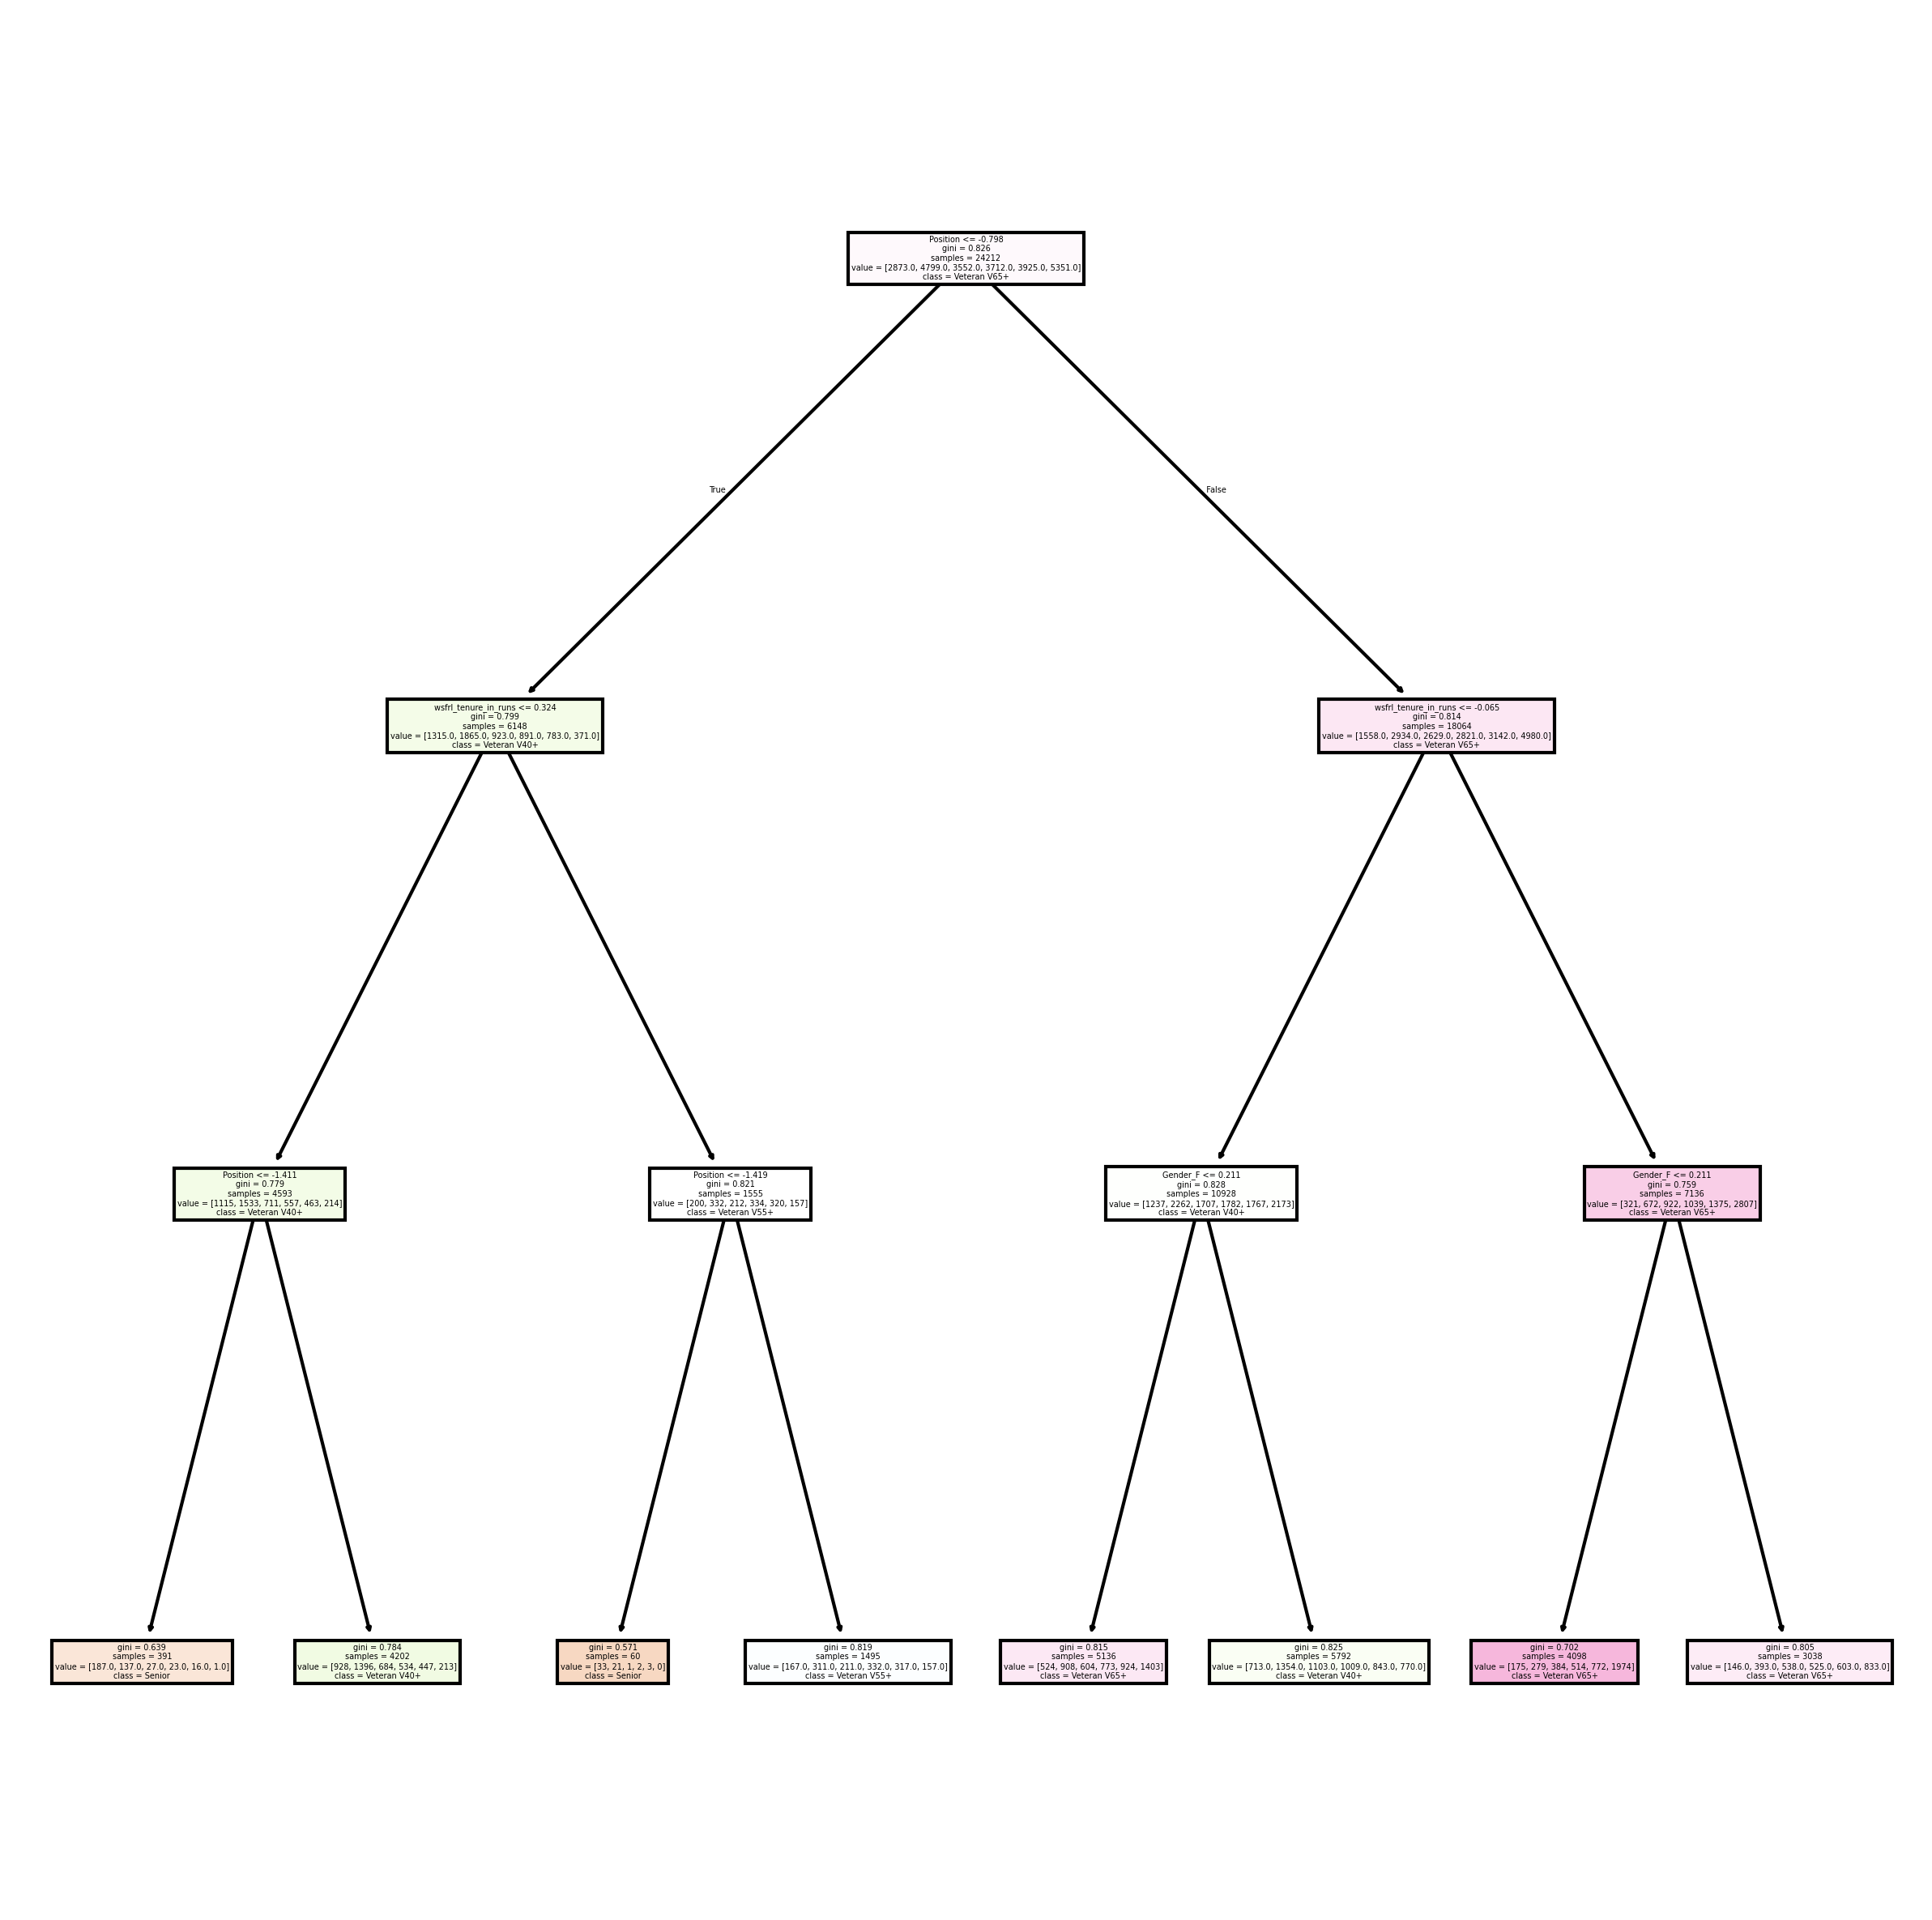

In [36]:
class_names = sorted(df_ages[WsfrlColumnForAgesGenerated.BlendedAgeCategoryPlus].unique())

plt.figure(figsize=(10, 10), dpi=300)
plot_tree(
    decision_tree_classifier_for_blended_plus, feature_names=df_feature_train.columns, class_names=class_names, filled=True
)
plt.show()

In [ ]:
(scaled_test_df_avg_age,
junk_as_on_test_linear_regression) = run_linear_regression_pipeline_in_stages(
    pipeline_linear_regression,
    df_feature_test,
    df_target_test,
    WsfrlColumnForAges.AgeAvgRange )

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test data
predictions = linear_regression.predict(scaled_test_df_avg_age)

# Calculate evaluation metrics
mae = mean_absolute_error(df_target_test[WsfrlColumnForAges.AgeAvgRange], predictions)
mse = mean_squared_error(df_target_test[WsfrlColumnForAges.AgeAvgRange], predictions)
r2 = r2_score(df_target_test[WsfrlColumnForAges.AgeAvgRange], predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")